# Day 1 - Data Science Essentials Program
## Intro to Pandas
- importing data from: Excel files, CSV files, SQL databases, websites (read_html)
- exploring the data and cleaning up (keeping only unique records, formatting of numbers and dates, blank rows)
    - how many rows, columns, data types of each column
    - unique categories in each column
    - stats of numerical cols (distribution data, average, min, max, median, etc.)
    - na or null values --> .dropna(), .fillna()
- merging/joining the data --> .concat, .merge
- adding calculated fields
- sorting, filtering
- grouping data --> pivot tables
- "EXCEL for Python"
- pandas cheat sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
- new data types: DataFrame (2-d table with multiple columns), Series (one column)

In [9]:
import pandas as pd
sp500 = pd.read_csv('StockData/SP500.csv')
#df = pd.read_excel('ExData/Data Manipulation Worksheet.xlsx') #by default the first tab
df = pd.read_excel('ExData/Data Manipulation Worksheet.xlsx', sheet_name='Financing Table')

**Coffee break until 10:20am BST/5:20 am**

In [10]:
type(df)

pandas.core.frame.DataFrame

## Exploring and Cleaning Data
- `.head()`, `.tail()` --> first/last 5 rows
- `.info()`
    - date --> should be datetime
    - numeric columns --> int or float
    - you might want to look for null values, do any of the columns have any blanks?

In [18]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1260 non-null   object 
 1   Open       1260 non-null   float64
 2   High       1260 non-null   float64
 3   Low        1260 non-null   float64
 4   Close      1260 non-null   float64
 5   Adj Close  1260 non-null   float64
 6   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              557 non-null    datetime64[ns]
 1   ISSUER            564 non-null    object        
 2   TYPE              558 non-null    object        
 3   SIZE              558 non-null    object        
 4   INDUSTRY          557 non-null    object        
 5   LEAD UNDERWRITER  557 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 26.8+ KB


In [14]:
# df.head() #5 rows
# df.head(20)
df.tail(20)

,DATE,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
548,2006-06-19,Comerica Bank,CD Notes,300.11,Finance,Merrill Lynch
549,2006-06-19,Consolidated Edison Inc.,Notes,300.12,Utility,Salomon Smith Barney
550,2006-06-20,MBNA Capital Securities D,Preferred Securities,300.1,Finance,Salomon Smith Barney
551,2006-06-20,Anworth Mortgage Asset Corp,Equity Follow-On Offering,117,Real Estate,"Friedman, Billings, Ramsey"
552,2006-06-21,Alabama Power Company,Sr Notes,350,Utility,Lehman Brothers
553,2006-06-21,Sears Roebuck Acceptance Corp,Sr Notes,250.1,Finance,Merrill Lynch
554,2006-06-21,DQE Inc,Equity Follow-On Offering,202.5,Utility,Lehman Brothers
555,2006-06-21,MassMutual,Global Notes,200.1,Finance,Morgan Stanley
556,2006-06-21,Conceptus Inc,Equity Follow-On Offering,72,Healthcare,UBS Warburg
557,NaT,NaN,NaN,NaN,NaN,NaN


**Re-import data and fix while importing**

In [19]:
sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/30/13,1687.260010,1687.260010,1674.989990,1681.550049,1681.550049,3308630000
1,10/01/13,1682.410034,1696.550049,1682.069946,1695.000000,1695.000000,3238690000
2,10/02/13,1691.900024,1693.869995,1680.339966,1693.869995,1693.869995,3148600000
3,10/03/13,1692.349976,1692.349976,1670.359985,1678.660034,1678.660034,3279650000
4,10/04/13,1678.790039,1691.939941,1677.329956,1690.500000,1690.500000,2880270000


In [26]:
# sp500 = pd.read_csv('StockData/SP500.csv', parse_dates=['Date'])
sp500 = pd.read_csv('StockData/SP500.csv', parse_dates=['Date'], date_format='%m/%d/%y')
            #most of the time you don't need the date_format, will figure it out on its own
            #date_format ---> source format of the dates
                #the way it fixes is always the same -->  %Y-%m-%d   (  yyyy-mm-dd)

In [28]:
# sp500.info()
# sp500.head()

In [37]:
aapl = pd.read_csv('StockData/AAPL.csv')
# aapl.info()
#code
#code
#you already did a lot of work on cleaning the data, and then LATER you need to fix the dates

In [33]:
pd.to_datetime("4/9/2024") #April 9
pd.to_datetime("4/9/2024", format="%d/%m/%Y") #September 4

Timestamp('2024-09-04 00:00:00')

In [39]:
# aapl['Date'].dt.year
    #this doesn't work yet

In [40]:
aapl['Date'] = pd.to_datetime(aapl['Date'], format='%m/%d/%y')

In [49]:
aapl['Quarter'] = aapl['Date'].dt.quarter
aapl['Month'] = aapl['Date'].dt.month
aapl['Year'] = aapl['Date'].dt.year
        # dt.month, .year, .day, .quarter, etc.
aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Quarter,Month,Year
0,2013-10-01,68.349998,69.877144,68.339996,69.708572,63.523125,88470900,4,10,2013
1,2013-10-02,69.375717,70.257141,69.107140,69.937141,63.731426,72296000,4,10,2013
2,2013-10-03,70.072861,70.335716,68.677139,69.058571,62.930801,80688300,4,10,2013
3,2013-10-04,69.122856,69.228569,68.371429,69.004288,62.881340,64717100,4,10,2013
4,2013-10-07,69.508568,70.378571,69.335716,69.678574,63.495800,78073100,4,10,2013


In [36]:
aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-10-01,68.349998,69.877144,68.339996,69.708572,63.523125,88470900
1,2013-10-02,69.375717,70.257141,69.107140,69.937141,63.731426,72296000
2,2013-10-03,70.072861,70.335716,68.677139,69.058571,62.930801,80688300
3,2013-10-04,69.122856,69.228569,68.371429,69.004288,62.881340,64717100
4,2013-10-07,69.508568,70.378571,69.335716,69.678574,63.495800,78073100


In [53]:
# df = pd.read_excel('ExData/Data Manipulation Worksheet.xlsx', skipfooter=11)
                #skip the last 11 rows
# df.info()

In [60]:
#df = df.iloc[0:df.shape[0]-11]

In [54]:
df = pd.read_excel('ExData/Data Manipulation Worksheet.xlsx', sheet_name='Financing Table Clean')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              557 non-null    datetime64[ns]
 1   ISSUER            557 non-null    object        
 2   TYPE              557 non-null    object        
 3   SIZE              557 non-null    float64       
 4   INDUSTRY          557 non-null    object        
 5   LEAD UNDERWRITER  557 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 26.2+ KB


## Accessing the Data
- look at the rows or columns
- look at slices (combos of rows and cols)
- rows:
    - df.iloc[x:y] --> row numbers, iloc = integer location;    x <= row < y
    - df.loc[x:y] --> where x,y are the new index you create;   x <= row <= y
        - you can change the index while importing with read_csv, `index_col = [column]`
        - pd.set_index(column)
- columns:
    - `df['column']`
    - `df[['col1', 'col2', ....]]`
- slices:
    - `df.iloc[x:y][[columns]]`

In [70]:
sp500.iloc[2]['Close'] #share price on Oct 2, 2013

1693.869995

In [69]:
sp500.iloc[0:5][['Date','Close']]

,Date,Close
0,2013-09-30,1681.550049
1,2013-10-01,1695.000000
2,2013-10-02,1693.869995
3,2013-10-03,1678.660034
4,2013-10-04,1690.500000


In [68]:
# sp500['Close']
sp500[['Date','Close','Open']]

,Date,Close,Open
0,2013-09-30,1681.550049,1687.260010
1,2013-10-01,1695.000000,1682.410034
2,2013-10-02,1693.869995,1691.900024
3,2013-10-03,1678.660034,1692.349976
4,2013-10-04,1690.500000,1678.790039
...,...,...,...
1255,2018-09-24,2919.370117,2921.830078
1256,2018-09-25,2915.560059,2921.750000
1257,2018-09-26,2905.969971,2916.979980
1258,2018-09-27,2914.000000,2911.649902


In [65]:
sp500.iloc[5:10]
    # 5 <= row < 10
sp500.iloc[-10:] #last 10 rows, same as .tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1250,2018-09-17,2903.830078,2904.649902,2886.159912,2888.800049,2888.800049,2947760000
1251,2018-09-18,2890.739990,2911.169922,2890.429932,2904.310059,2904.310059,3074610000
1252,2018-09-19,2906.600098,2912.360107,2903.820068,2907.949951,2907.949951,3280020000
1253,2018-09-20,2919.729980,2934.800049,2919.729980,2930.750000,2930.750000,3337730000
1254,2018-09-21,2936.760010,2940.909912,2927.110107,2929.669922,2929.669922,5607610000
1255,2018-09-24,2921.830078,2923.790039,2912.629883,2919.370117,2919.370117,3372210000
1256,2018-09-25,2921.750000,2923.949951,2913.699951,2915.560059,2915.560059,3285480000
1257,2018-09-26,2916.979980,2931.149902,2903.280029,2905.969971,2905.969971,3388620000
1258,2018-09-27,2911.649902,2927.219971,2909.270020,2914.000000,2914.000000,3060850000
1259,2018-09-28,2910.030029,2920.530029,2907.500000,2913.979980,2913.979980,3432300000


**Changing the index**

Two options, while importing or later:
- `pd.read_csv(........, index_col=[header])`
- `df = df.set_index(col)`

In [82]:
#Option 1 - while importing
sp500 = pd.read_csv('StockData/SP500.csv', 
                    parse_dates=['Date'], 
                    date_format='%m/%d/%y',
                    index_col = ['Date']
                   )
sp500.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-09-30,1687.260010,1687.260010,1674.989990,1681.550049,1681.550049,3308630000
2013-10-01,1682.410034,1696.550049,1682.069946,1695.000000,1695.000000,3238690000


In [83]:
#Option 2 - if you forgot, can do it later
sp500 = pd.read_csv('StockData/SP500.csv', parse_dates=['Date'], date_format='%m/%d/%y')
#code
#code
#code
sp500 = sp500.set_index('Date')
# sp500

In [84]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2013-09-30 to 2018-09-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1260 non-null   float64
 1   High       1260 non-null   float64
 2   Low        1260 non-null   float64
 3   Close      1260 non-null   float64
 4   Adj Close  1260 non-null   float64
 5   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


In [86]:
sp500.loc['2013-10-7']['Close']

1676.119995

In [88]:
sp500.loc['2015-01-02':'2015-01-12']
    #what do you notice about the range?
    #it's inclusive of the top end now

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000
2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,3799120000
2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,4460110000
2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,3805480000
2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,2062.139893,3934010000
2015-01-09,2063.449951,2064.429932,2038.329956,2044.810059,2044.810059,3364140000
2015-01-12,2046.130005,2049.300049,2022.579956,2028.260010,2028.260010,3456460000


In [92]:
# sp500.loc['2015-01':'2015-03'] #Q1, Jan 1 to Mar 31
# sp500.loc['2016'] #all rows from 2016, jan to dec

In [96]:
# aapl[(aapl['Date']>='2015-01-01') & (aapl['Date']<='2015-03-31')]

In [97]:
sp500.loc['2013-10-07']['Close']

1676.119995

In [93]:
sp500.loc['2016'][['High','Low']]

,High,Low
Date,,
2016-01-04,2038.199951,1989.680054
2016-01-05,2021.939941,2004.170044
2016-01-06,2011.709961,1979.050049
2016-01-07,1985.319946,1938.829956
2016-01-08,1960.400024,1918.459961
...,...,...
2016-12-23,2263.790039,2258.840088
2016-12-27,2273.820068,2266.149902
2016-12-28,2271.310059,2249.110107


In [99]:
sp500[['Close','Open']]

,Close,Open
Date,,
2013-09-30,1681.550049,1687.260010
2013-10-01,1695.000000,1682.410034
2013-10-02,1693.869995,1691.900024
2013-10-03,1678.660034,1692.349976
2013-10-04,1690.500000,1678.790039
...,...,...
2018-09-24,2919.370117,2921.830078
2018-09-25,2915.560059,2921.750000
2018-09-26,2905.969971,2916.979980


**Creating a dataframe from json or dictionary**

In [102]:
data = {'Tickers':['AAPL','AMZN','NFLX'],
        'Price':[150, 600, 50],
        'Company':['Apple','Amazon','Netflix']
       }
table = pd.DataFrame(data)
table

,Tickers,Price,Company
0,AAPL,150,Apple
1,AMZN,600,Amazon
2,NFLX,50,Netflix


**Example of converting a json to a table**
- data below from FRED API
- https://fred.stlouisfed.org/docs/api/fred/series_observations.html#example_json

In [103]:
data = {
    "realtime_start": "2013-08-14",
    "realtime_end": "2013-08-14",
    "observation_start": "1776-07-04",
    "observation_end": "9999-12-31",
    "units": "lin",
    "output_type": 1,
    "file_type": "json",
    "order_by": "observation_date",
    "sort_order": "asc",
    "count": 84,
    "offset": 0,
    "limit": 100000,
    "observations": [
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1929-01-01",
            "value": "1065.9"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1930-01-01",
            "value": "975.5"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1931-01-01",
            "value": "912.1"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1932-01-01",
            "value": "794.1"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1933-01-01",
            "value": "783.3"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1934-01-01",
            "value": "866.7"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1935-01-01",
            "value": "944.3"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1936-01-01",
            "value": "1065.0"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1937-01-01",
            "value": "1120.6"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1938-01-01",
            "value": "1083.9"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1939-01-01",
            "value": "1170.2"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1940-01-01",
            "value": "1271.7"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1941-01-01",
            "value": "1497.6"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1942-01-01",
            "value": "1779.4"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1943-01-01",
            "value": "2081.2"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1944-01-01",
            "value": "2247.3"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1945-01-01",
            "value": "2224.7"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1946-01-01",
            "value": "1969.3"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1947-01-01",
            "value": "1950.6"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1948-01-01",
            "value": "2033.2"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1949-01-01",
            "value": "2021.1"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1950-01-01",
            "value": "2197.5"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1951-01-01",
            "value": "2376.4"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1952-01-01",
            "value": "2473.1"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1953-01-01",
            "value": "2587.7"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1954-01-01",
            "value": "2574.2"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1955-01-01",
            "value": "2758.4"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1956-01-01",
            "value": "2818.6"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1957-01-01",
            "value": "2878.5"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1958-01-01",
            "value": "2854.6"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1959-01-01",
            "value": "3050.8"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1960-01-01",
            "value": "3130.4"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1961-01-01",
            "value": "3211.9"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1962-01-01",
            "value": "3409.8"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1963-01-01",
            "value": "3559.0"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1964-01-01",
            "value": "3764.8"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1965-01-01",
            "value": "4008.8"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1966-01-01",
            "value": "4269.4"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1967-01-01",
            "value": "4386.7"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1968-01-01",
            "value": "4602.8"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1969-01-01",
            "value": "4745.2"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1970-01-01",
            "value": "4754.6"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1971-01-01",
            "value": "4913.6"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1972-01-01",
            "value": "5172.2"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1973-01-01",
            "value": "5475.1"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1974-01-01",
            "value": "5454.1"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1975-01-01",
            "value": "5430.4"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1976-01-01",
            "value": "5729.1"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1977-01-01",
            "value": "5997.3"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1978-01-01",
            "value": "6326.9"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1979-01-01",
            "value": "6547.0"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1980-01-01",
            "value": "6530.3"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1981-01-01",
            "value": "6688.0"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1982-01-01",
            "value": "6564.6"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1983-01-01",
            "value": "6863.2"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1984-01-01",
            "value": "7352.5"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1985-01-01",
            "value": "7640.2"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1986-01-01",
            "value": "7890.9"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1987-01-01",
            "value": "8161.0"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1988-01-01",
            "value": "8509.9"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1989-01-01",
            "value": "8822.6"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1990-01-01",
            "value": "9003.0"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1991-01-01",
            "value": "8988.6"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1992-01-01",
            "value": "9305.0"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1993-01-01",
            "value": "9559.8"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1994-01-01",
            "value": "9932.2"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1995-01-01",
            "value": "10206.2"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1996-01-01",
            "value": "10595.1"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1997-01-01",
            "value": "11058.1"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1998-01-01",
            "value": "11540.7"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1999-01-01",
            "value": "12108.9"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "2000-01-01",
            "value": "12614.3"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "2001-01-01",
            "value": "12750.2"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "2002-01-01",
            "value": "12970.8"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "2003-01-01",
            "value": "13352.2"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "2004-01-01",
            "value": "13879.0"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "2005-01-01",
            "value": "14340.8"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "2006-01-01",
            "value": "14690.9"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "2007-01-01",
            "value": "15009.7"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "2008-01-01",
            "value": "15009.0"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "2009-01-01",
            "value": "14565.1"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "2010-01-01",
            "value": "14966.5"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "2011-01-01",
            "value": "15286.7"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "2012-01-01",
            "value": "15693.1"
        }
    ]
}

In [108]:
fred_data = pd.DataFrame(data['observations'])
fred_data = fred_data[['date','value']]
# fred_data.info()

In [109]:
fred_data['value'] = pd.to_numeric(fred_data['value'])
fred_data['date'] = pd.to_datetime(fred_data['date'])

In [111]:
# fred_data.info()

<Axes: xlabel='date'>

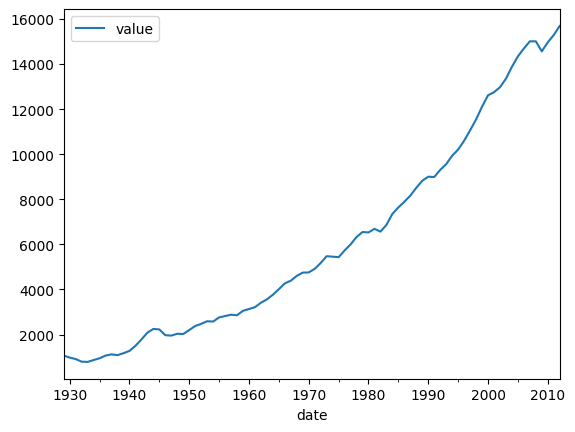

In [113]:
fred_data.plot(x='date',y='value')

**Lunch break until 1pm BST / 8am EST**
- latest notes in the chat